# Algorithm : Symbolic Aggregate approXimation (SAX)

<h5>Description:</h5>
<ul>
<li>This algorithm segments a time series into continuous pieces and approximates each segment with a linear function.</li>
<li>It employs Symbolic Aggregate Approximation (SAX) to discretize the time series into symbolic sequences.</li>
<li>The number of segments is specified by the user.</li>
<li>After segmentation, it reconstructs the time series from the SAX representation.</li>
<li>The resulting time series is a piecewise constant approximation of the original data.</li>
</ul>

<h3>Importing the necessary libraries</h3>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from saxpy.znorm import znorm

## Define Functions

In [2]:
def read_data_from_txt_file(file_path):
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            data = [float(line.strip()) for line in lines if line.strip()]
        xs = np.arange(len(data))
        ys = np.array(data)
        return xs, ys
    except FileNotFoundError:
        print("File not found.")
        return None, None
    except Exception as e:
        print("Error reading data:", e)
        return None, None

def read_data_from_csv_file(file_path,target_name):
    try:
        df=pd.read_csv(file_path)
        xs = np.arange(len(df))
        ys = df[target_name].values
        return xs, ys
    except FileNotFoundError:
        print("File not found.")
        return None, None
    except Exception as e:
        print("Error reading data:", e)
        return None, None

In [36]:
beta = {3: [-0.43, 0.43],
            4: [-0.67, 0,0.67],
            5: [-0.84, -0.25,0.25, 0.84],
            6: [-0.97, -0.43, 0, 0.43, 0.97],
            7: [-1.07, -0.57, -0.18, 0.18,0.57,1.07],
            8: [-1.15, -0.67, -0.32, 0, 0.32, 0.67, 1.15],
            9: [-1.22, -0.76, -0.43, -0.14, 0.14, 0.43, 0.76, 1.22],
            10: [-1.28, -0.84, -0.52, -0.25, 0, 0.25, 0.52, 0.84, 1.28]}

def get_char(y,a):
    arr=beta[a]
    for i in range(len(arr) - 1):
        if arr[i] <= y < arr[i + 1]:
            return chr(ord('A') + i+1) 
    # If y is greater than the last element of arr, return the last index
    if y >= arr[-1]:
        return  chr(ord('A') + len(arr))  
    # If y is less than the first element of arr, return 0
    if y < arr[0]:
        return 'A'


In [38]:
def SAX(y,w):
    n=len(y)
    # Normalization
    y_normal = znorm(y)
    
    # PAA Transformation 
    C=[]
    for i in range(1,w+1):
        c=0
        for j in range(int((n/w)*(i-1)+1),int(n/w)*i,1):
            c=c+y_normal[j]
        C.append(c*w/n)
    C=np.asarray(C)
    
    yp = []
    for item in C:
        yp.extend([item] * int(n/w))

    # plot SAX presentation
    plt.figure(figsize=(20,10))
    plt.plot(y_normal,label='Raw Time Series')
    plt.plot(yp, label='SAX')
    for i,el in enumerate(C):
        plt.axvline(x=int(n/w)*i, color='red', linestyle='--')
        char=get_char(el,w)
        plt.text(n//w *(i+.5), el+.2, char, fontsize=20, color='red',weight="bold")
    plt.legend(loc='best')
    plt.show()

<h3>Testing Algorithm on Weather Data</h3>

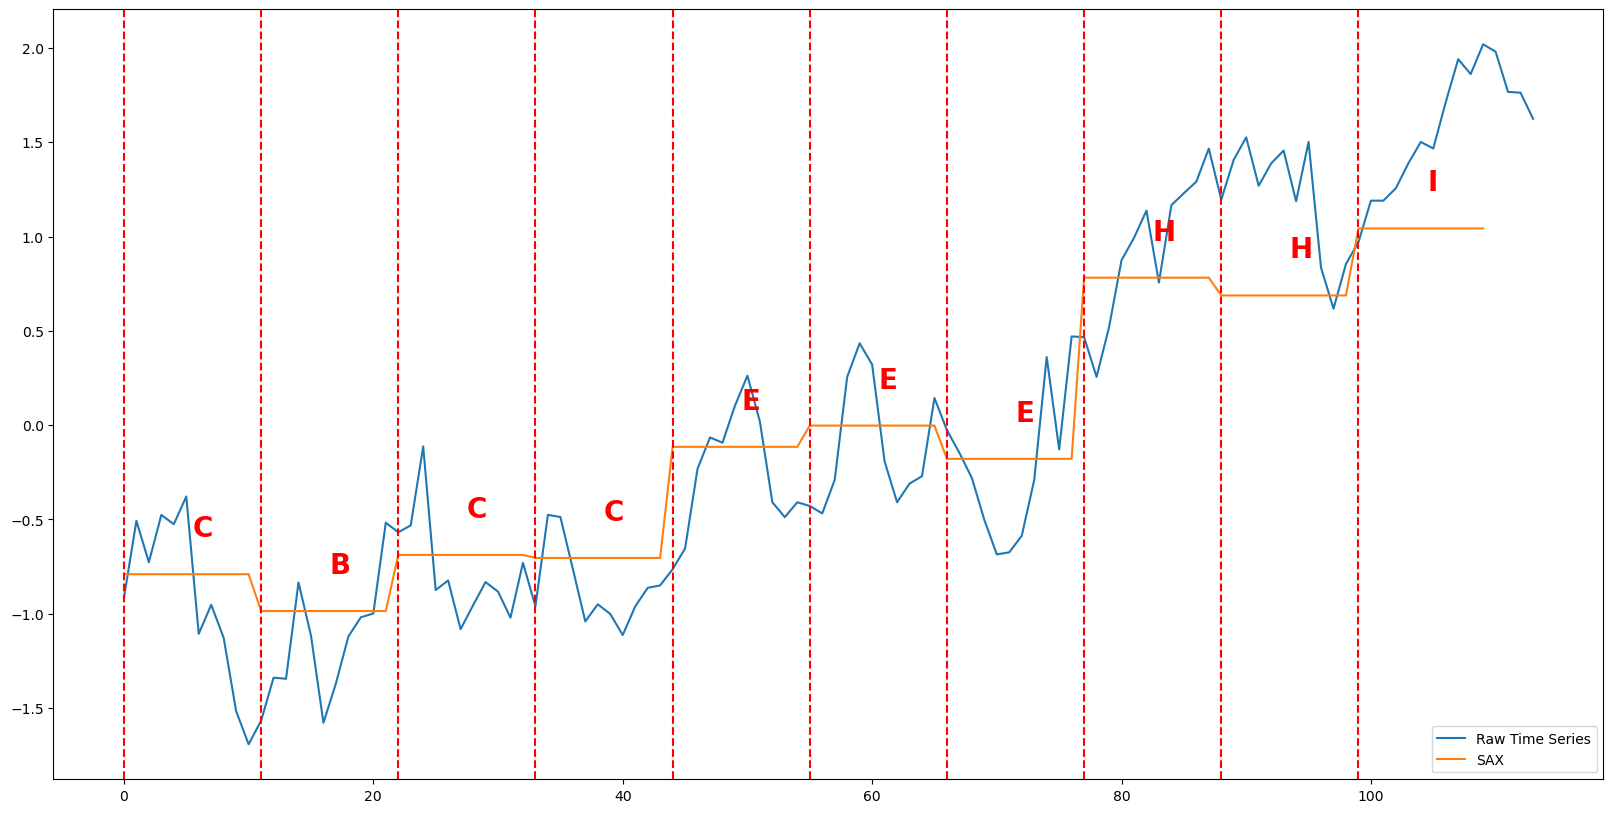

In [39]:
# Read data from a CSV file
file_path = '../datasets/weather dataset/DailyDelhiClimateTest.csv'
X, y = read_data_from_csv_file(file_path,target_name="meantemp")
SAX(y,10)

<h3>Testing Algorithm on DodgerLoopDay Data</h3>

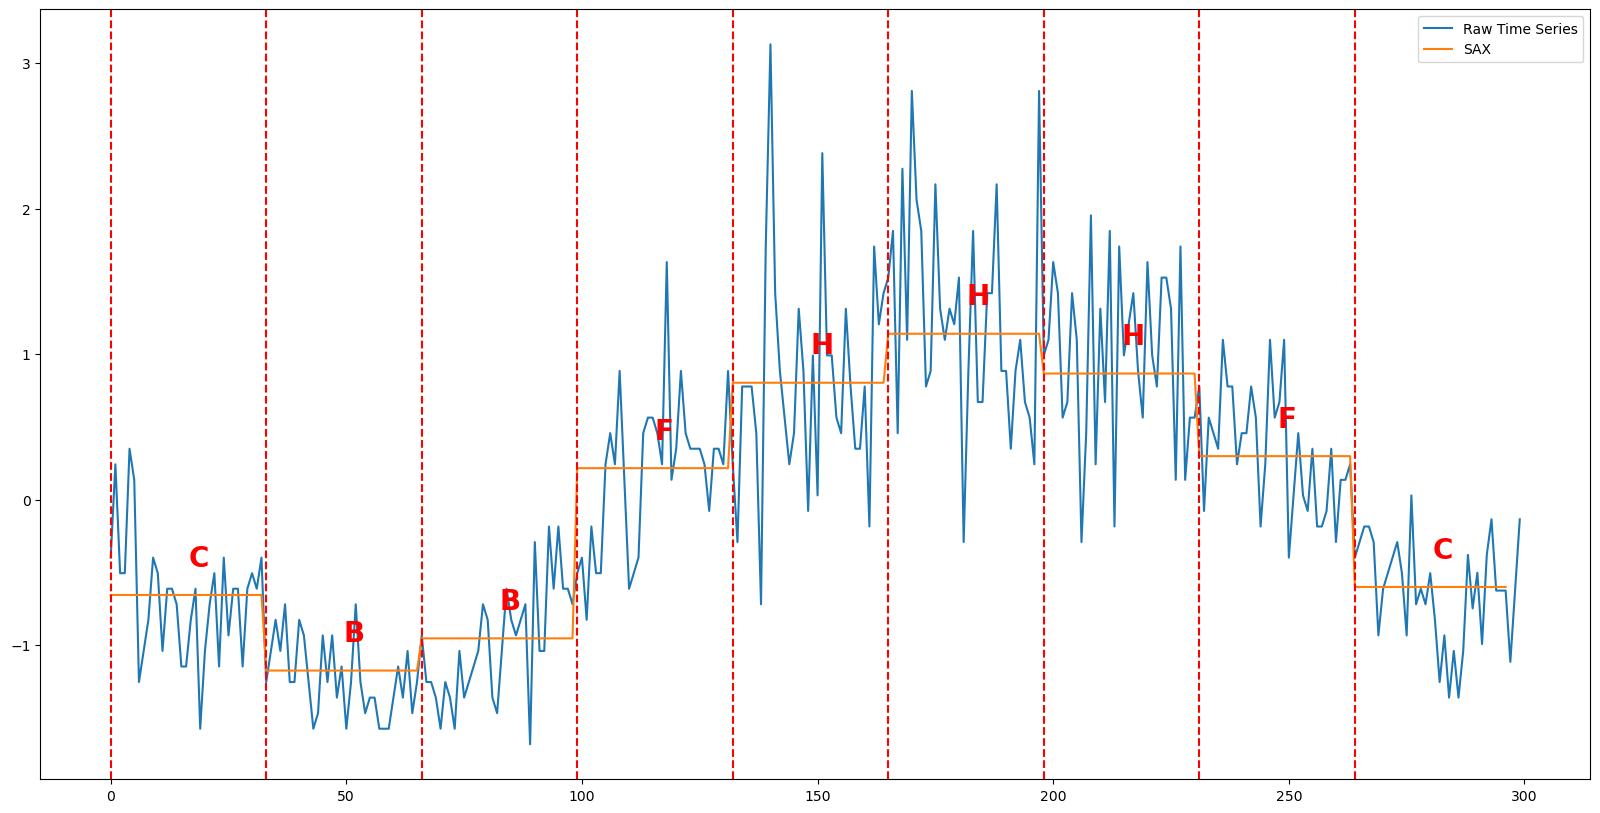

In [51]:
# Read data from a CSV file
file_path = '../datasets/UCR Time Series/DodgerLoopDay.txt'
X, y = read_data_from_txt_file(file_path)
SAX(y[:300],9)

<h3>Testing Algorithm on DiatomSizeReduction Data</h3>

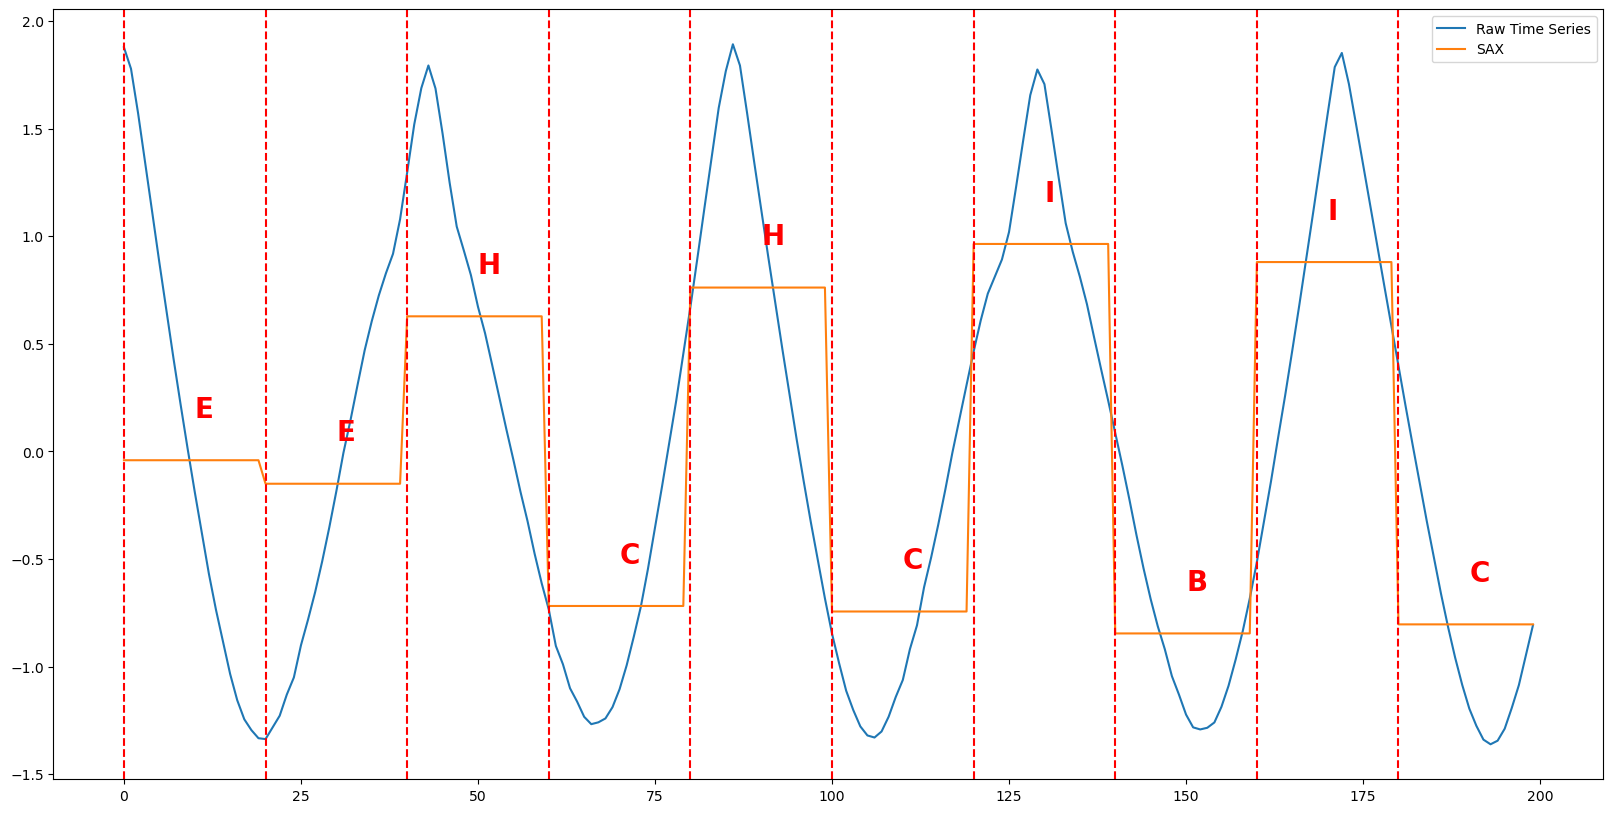

In [58]:
# Read data from a CSV file
file_path = '../datasets/UCR Time Series/DiatomSizeReduction.txt'
X, y = read_data_from_txt_file(file_path)
SAX(y[:200],10)

<h3>Testing Algorithm on CBF Data</h3>

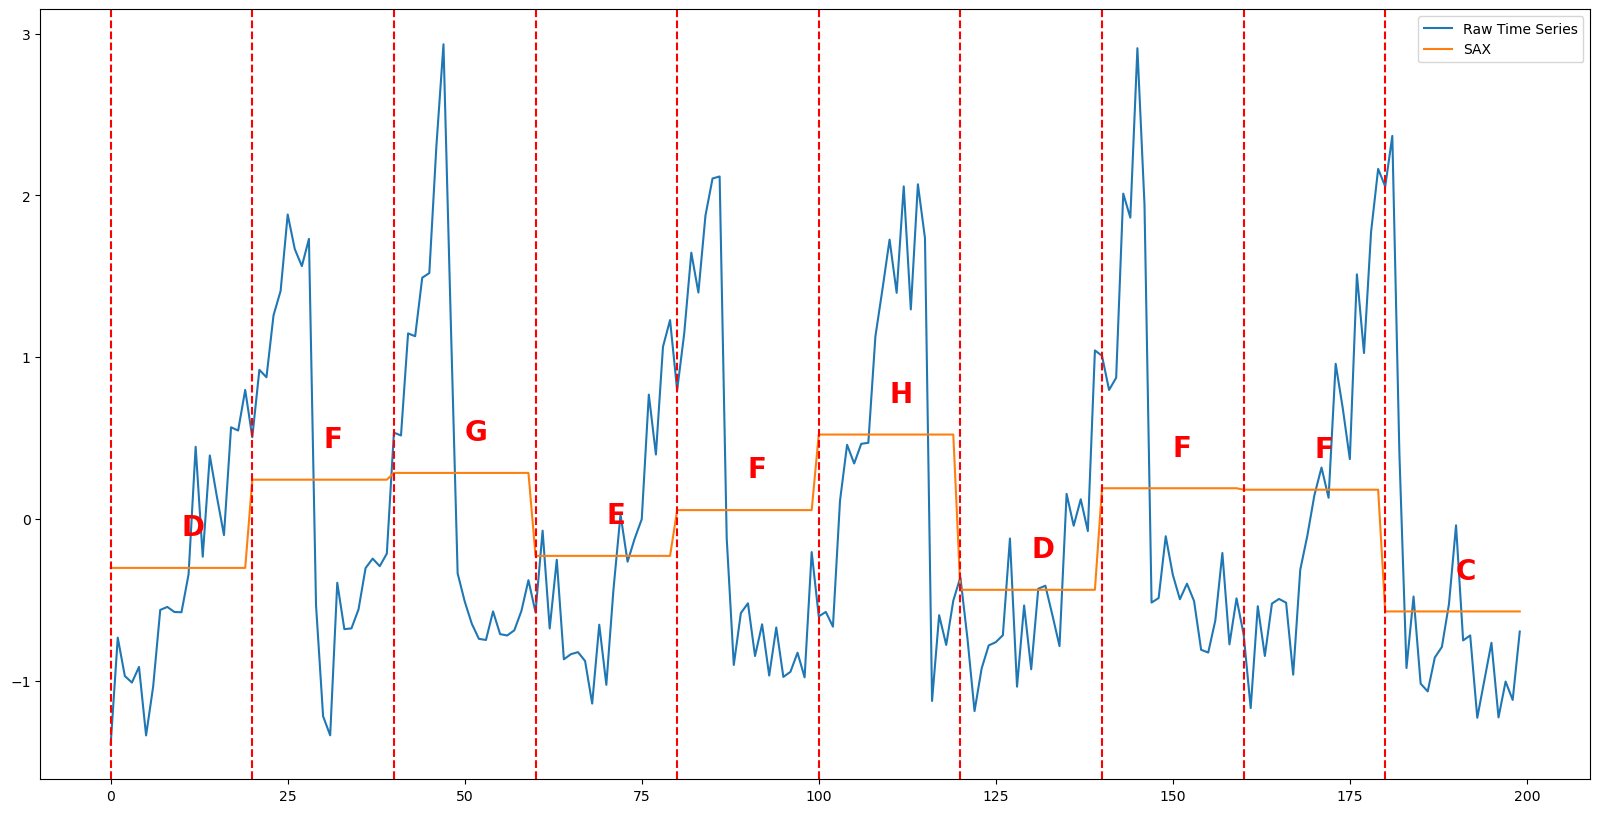

In [63]:
# Read data from a CSV file
file_path = '../datasets/UCR Time Series/CBF.txt'
X, y = read_data_from_txt_file(file_path)
SAX(y[:200],10)

<h3>Testing Algorithm on Herring Data</h3>

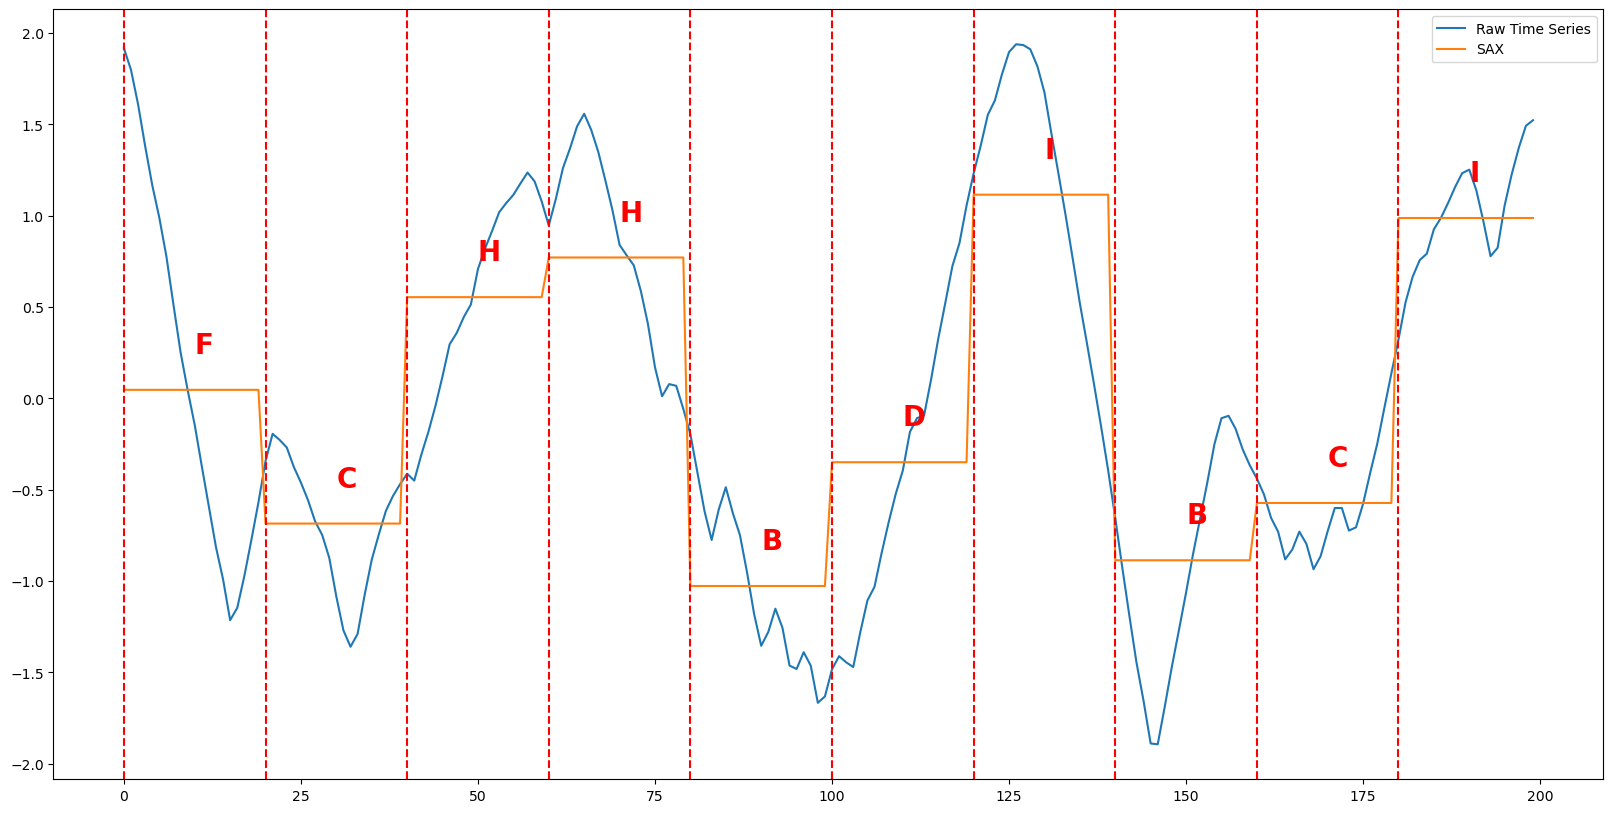

In [64]:
# Read data from a CSV file
file_path = '../datasets/UCR Time Series/Herring.txt'
X, y = read_data_from_txt_file(file_path)
SAX(y[:200],10)